In [1]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_genetator = CmdStanModel(stan_file = 'generate_data.stan')

I= 7
N= 3
DoB= 19990914
seed=int(DoB+100*I+N)
print(seed)
generated_data = data_genetator.sample(chains=1, iter_sampling=1, iter_warmup=0, fixed_param=True,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


19991617


chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


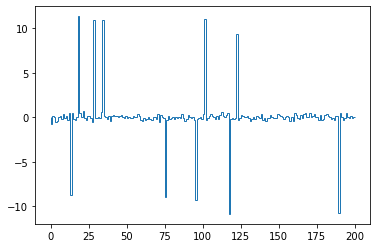

In [3]:
beta_s = generated_data.stan_variable('beta')
plt.stairs(generated_data.stan_variable('beta')[0])

### Model 1 - Uniform prior for beta

In [4]:
model_uniform = CmdStanModel(stan_file = 'model1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [5]:
df = generated_data.draws_pd()
df

,lp__,accept_stat__,"x[1,1]","x[2,1]","x[3,1]","x[4,1]","x[5,1]","x[6,1]","x[7,1]","x[8,1]",...,beta[191],beta[192],beta[193],beta[194],beta[195],beta[196],beta[197],beta[198],beta[199],beta[200]
0,0.0,0.0,-0.718588,-1.50287,-0.294815,-2.83024,0.870321,1.146,0.864613,-1.02788,...,0.482699,0.047702,-0.260196,-0.051218,0.525902,0.035066,-0.086388,0.097144,-0.07383,0.0206


In [6]:
data_for_inference = {'N':100,
                      'M':200,
                      'x':generated_data.stan_variable('x')[0],
                      'y':generated_data.stan_variable('y')[0]
                      }

In [7]:
fit_unf = model_uniform.sample(data=data_for_inference,seed=seed)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:03 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:08 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |█▊        | 00:13 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:19 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:24 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:29 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:34 Iteration:  600 / 2000 [ 30%]  (Warmup)



chain 1 |████      | 00:40 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:45 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:50 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:55 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████▎   | 01:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 01:08 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎ 


INFO:cmdstanpy:CmdStan done processing.


In [8]:
print(fit_unf.diagnose())

Processing csv files: C:\Users\User\AppData\Local\Temp\tmpbj3zu4ty\model1-20220405051451_1.csv, C:\Users\User\AppData\Local\Temp\tmpbj3zu4ty\model1-20220405051451_2.csv, C:\Users\User\AppData\Local\Temp\tmpbj3zu4ty\model1-20220405051451_3.csv, C:\Users\User\AppData\Local\Temp\tmpbj3zu4ty\model1-20220405051451_4.csv

Checking sampler transitions treedepth.
3977 of 4000 (99.42%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
23 of 4000 (0.57%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
The E-BFMI, 0.01, is be

# <span style='color:Yellow'> Task 1. Evaluating model </span>

In [9]:
df = fit_unf.draws_pd()
df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,beta[1],beta[2],beta[3],...,beta[193],beta[194],beta[195],beta[196],beta[197],beta[198],beta[199],beta[200],alpha,sigma
0,-63.3923,0.849386,0.000258,10.0,1023.0,0.0,161.878,-385.060,-490.718,-564.173,...,-517.032,-236.992,-1108.180,88.7365,62.7101,-1129.670,838.873,2.887880,2.89478,1.13183
1,-65.0975,0.946732,0.000258,10.0,1023.0,0.0,164.981,-379.411,-487.892,-566.676,...,-508.982,-248.820,-1093.790,88.9807,53.8103,-1132.120,835.796,-0.503061,3.14514,1.10201
2,-72.7376,0.834416,0.000258,10.0,1023.0,0.0,168.656,-367.221,-496.377,-571.436,...,-510.506,-253.843,-1090.150,94.0007,51.9315,-1139.680,848.240,-4.518750,3.12690,1.12412
3,-69.3760,0.955991,0.000258,10.0,1023.0,0.0,164.774,-367.953,-503.314,-579.939,...,-515.508,-254.657,-1090.920,93.0050,65.5002,-1143.600,855.165,-2.857740,3.24355,1.14050
4,-64.7816,0.983704,0.000258,10.0,1023.0,0.0,165.748,-376.081,-497.173,-579.771,...,-512.998,-247.214,-1094.660,95.6864,59.9655,-1152.770,857.394,-11.659700,3.18246,1.15306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-65.4880,0.905948,0.000134,10.0,1023.0,0.0,168.751,219.057,-505.691,472.294,...,957.639,-176.582,882.872,459.6500,-833.4310,-671.075,-268.642,-259.281000,2.34844,1.09817
3996,-54.1171,0.881686,0.000134,10.0,1023.0,0.0,158.841,213.367,-504.415,479.012,...,944.360,-184.946,867.269,459.5010,-824.5730,-656.198,-273.979,-262.132000,2.46107,1.10121
3997,-55.5888,0.802532,0.000134,10.0,1023.0,0.0,154.509,205.136,-500.670,491.530,...,939.128,-180.133,870.087,464.4980,-817.3600,-666.367,-271.892,-255.901000,2.29317,1.14709
3998,-58.9340,0.867882,0.000134,10.0,1023.0,0.0,154.209,217.177,-511.905,486.845,...,949.428,-178.950,872.844,467.2300,-814.4050,-676.149,-277.569,-258.173000,2.24960,1.14331


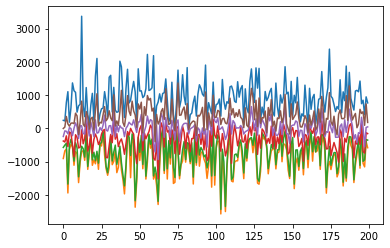

In [10]:
def plots(b):
    max = []
    min = []

    quantiles = {}
    quantiles['q1'] = []
    quantiles['q2'] = []
    quantiles['q3'] = []
    quantiles['q4'] = []
    quantiles['q5'] = []
    for i in range(b.shape[1]):
        b_c = b[:,i] 
        max.append(np.max(b_c))
        min.append(np.min(b_c))

    
        quantiles['q1'].append(np.quantile(b_c, 0.05))
        quantiles['q2'].append(np.quantile(b_c, 0.25))
        quantiles['q3'].append(np.quantile(b_c, 0.5))
        quantiles['q4'].append(np.quantile(b_c, 0.75))
        quantiles['q5'].append(np.quantile(b_c, 0.95))

    plt.plot(max)
    plt.plot(min)


    for i in range(1,len(quantiles.keys())):
        plt.plot(quantiles['q'+str(i)])

    plt.show()

beta = fit_unf.stan_variable('beta')
plots(beta)

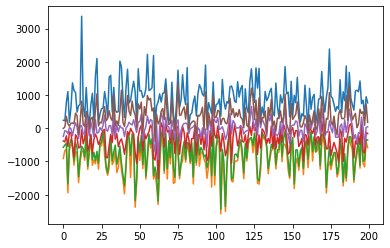

In [11]:
residues = beta - data_for_inference['x'][:,0]
plots(residues)